## first we need to import the data set and have a declaration

In this chapter, we will be using the MNIST dataset, which is a set of 70,000 small
images of digits handwritten by high school students and employees of the US Census
Bureau. Each image is labeled with the digit it represents

In [1]:
# import all modules that we might need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import matplotlib as mpl

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

C:\Users\mohammedsamir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, Y = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
# we want to display the an example from the data set

some_digit = X.iloc[[0]]

some_digit_image = np.array(some_digit).reshape(28, 28)

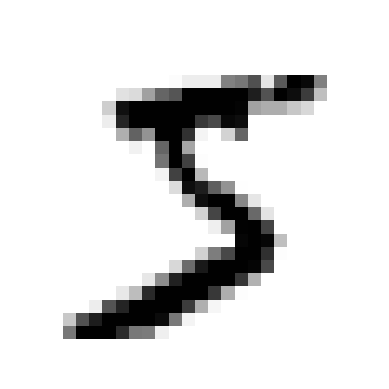

In [6]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
Y = Y.astype(np.uint8)

In [8]:
# we're gonna splitting the data into training set and testing set

x_train, x_test, y_train, y_test = X[0:60000],X[60000:],Y[0:60000],Y[60000:]



In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

<Axes: xlabel='class'>

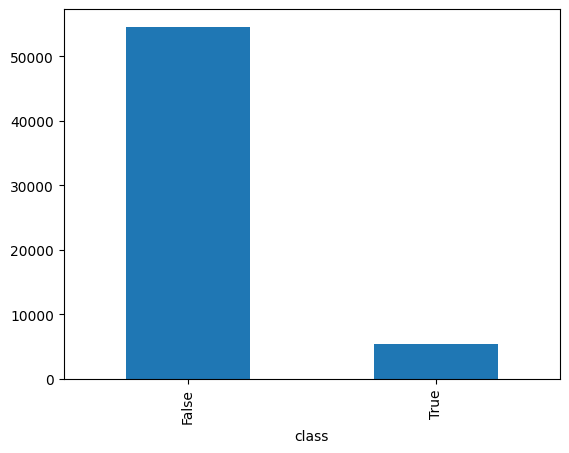

In [10]:
y_train_5.value_counts().plot(kind='bar')

In [11]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(random_state=42)

# Fit the model to the training data

SGD.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
# Now we did not use cross validation data

from sklearn.model_selection import cross_val_score

cross_val_arr = cross_val_score(SGD, x_train, y_train_5, cv=3, scoring="accuracy")


In [39]:
cross_val_arr

array([0.95035, 0.96035, 0.9604 ])

In [13]:
cross_val_arr.mean()

0.9570333333333334

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(SGD, x_train, y_train_5, cv=3)

y_train_pred

array([ True, False, False, ...,  True, False, False])

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [16]:
from sklearn.metrics import precision_score, recall_score,f1_score

def precision_recall_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return print(f"precision is {precision}, recall is {recall}, and the f1 score is {f1}")


In [17]:
precision_recall_score(y_train_5, y_train_pred)

precision is 0.8370879772350012, recall is 0.6511713705958311, and the f1 score is 0.7325171197343846


In [18]:
from sklearn.model_selection import cross_val_predict

y_score = cross_val_predict(SGD, x_train, y_train_5, cv=3, method='decision_function')

In [19]:
y_score

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [20]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train_5, y_score)

In [21]:
len(threshold), len(precision[:-1])

(60000, 60000)

In [22]:
# creating a function to visualize the precision, recall and threshold

def plot_precision_recall(precision, recall, threshold):
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=threshold, y=precision[:-1], label="Precision", linestyle='--')
    sns.lineplot(x=threshold, y=recall[:-1], label="Recall")
    plt.title('Precision-Recall Curve')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()

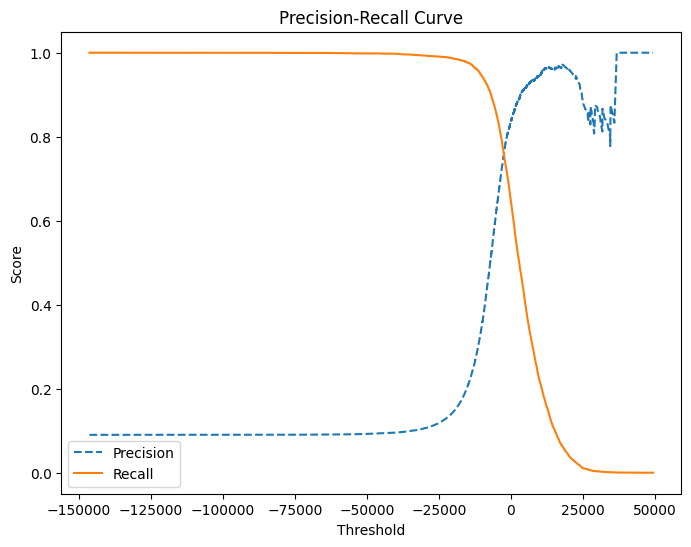

In [23]:
plot_precision_recall(precision, recall, threshold)

In [24]:
threshold_90_precision = threshold[np.argmax(precision >.90 )]
threshold_90_precision

3370.019499143957

In [25]:
y_train_pred_90 = (y_score >= threshold_90_precision)

In [26]:
precision_score(y_train_5, y_train_pred_90)
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [27]:
# plotting the ROC curve 

def  roc_curve(y_true, y_score):
    """here this finds the relation between the fpr  and tpr for different threshold values"""

    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    
    sns.lineplot(x=fpr, y=tpr)
    plt.title('Roc curve ')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


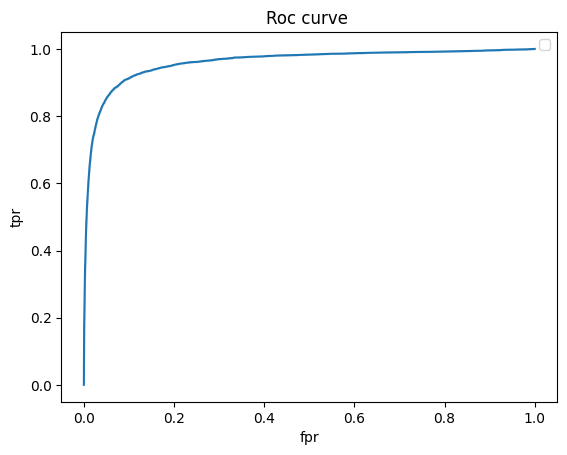

In [28]:
roc_curve(y_train_5, y_score)

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_score)

0.9604938554008616

In [30]:
# Now we're gonna try another model 

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=42)

from sklearn.model_selection import cross_val_predict

y_probas_forest = cross_val_predict(RFC, x_train, y_train_5, cv=3, method="predict_proba")

In [31]:
ran_y_score = y_probas_forest[:,1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


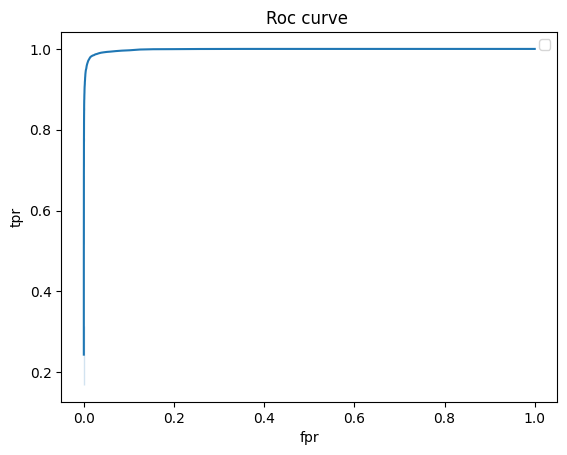

In [32]:
roc_curve(y_train_5, ran_y_score)

In [33]:
roc_auc_score(y_train_5, ran_y_score)

0.9983436731328145

In [34]:
from sklearn.preprocessing import StandardScaler

StandScale = StandardScaler()

x_train_scaled = StandScale.fit_transform(x_train.astype(np.float64))

In [40]:
from sklearn.model_selection import cross_val_score

avg_accuracy = cross_val_score(SGD, x_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [35]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(random_state=42)
from sklearn.model_selection import cross_val_predict

prediction = cross_val_predict(SGD, x_train_scaled, y_train, cv=3)

In [38]:
from sklearn.model_selection import cross_val_score

avg_accuracy = cross_val_score(SGD, x_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [44]:
avg_accuracy = [0.8983, 0.891 , 0.9018]
avg_accuray = np.array(avg_accuracy)
np.mean(avg_accuracy)

0.8970333333333333

In [47]:
# now we're gonna create a confusion matrix

conf_mx = confusion_matrix(y_train, prediction)

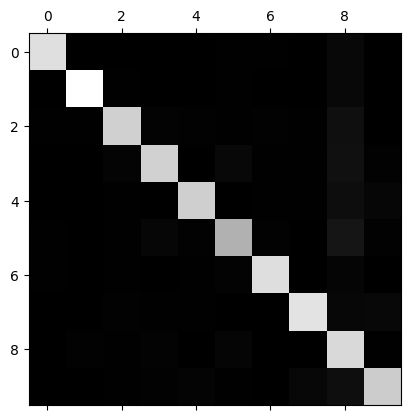

In [51]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [52]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

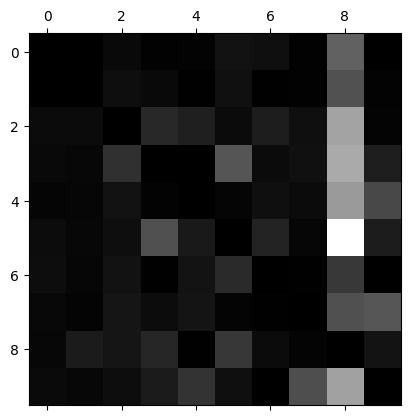

In [54]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [55]:
y_train >= 7

0        False
1        False
2        False
3        False
4         True
         ...  
59995     True
59996    False
59997    False
59998    False
59999     True
Name: class, Length: 60000, dtype: bool

In [57]:
y_train_large = (y_train >= 7)

y_train_odd = (y_train % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

In [64]:
knn_clf.predict(some_digit)

array([[False,  True]])